In [1]:
import cv2,os

data_path='train'

categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'Face_without_mask': 0, 'Face_with_mask': 1}
['Face_without_mask', 'Face_with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]

In [3]:
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            #Coverting the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            resized=cv2.resize(gray,(img_size,img_size))
            
            #appending the image and the label(categorized) into the list (dataset)
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

target=np_utils.to_categorical(target)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [6]:
model=Sequential()

#The first convolution layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 50 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
my_model = model.fit(train_data,train_target,epochs=40,validation_split=0.2, batch_size=10)

Epoch 1/40
794/794 [==============================] - ETA: 0s - loss: 0.3631 - accuracy: 0.8283WARNING:tensorflow:From C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
794/794 [==============================] - 311s 392ms/step - loss: 0.3631 - accuracy: 0.8283 - val_loss: 0.2142 - val_accuracy: 0.9229
Epoch 2/40
794/794 [==============================] - 322s 406ms/step - loss: 0.1969 - accuracy: 0.9326 - val_loss: 0.1496 - val_accuracy: 0.9466
Epoch 3/40
794/794 [==============================] - 323s 407ms/step - l

In [10]:
model.save('model_final.model')

INFO:tensorflow:Assets written to: model_final.model\assets


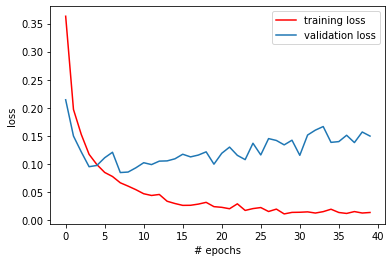

In [12]:
from matplotlib import pyplot as plt

plt.plot(my_model.history['loss'],'r',label='training loss')
plt.plot(my_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

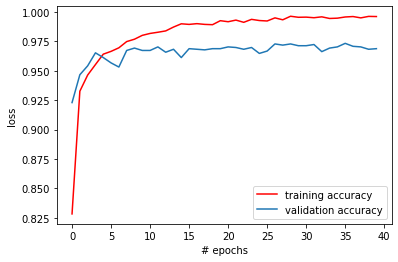

In [13]:
plt.plot(my_model.history['accuracy'],'r',label='training accuracy')
plt.plot(my_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

35/35 [==============================] - 10s 273ms/step - loss: 0.2631 - accuracy: 0.9637
[0.2630639970302582, 0.9637352824211121]
